In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Automobile MPG dataset from OpenML
#mpg = fetch_openml(name='autompg',version=3)
mpg = fetch_openml(data_id=42372)
# Convert to DataFrame
X = pd.DataFrame(mpg.data, columns=mpg.feature_names)
y = pd.DataFrame(mpg.target)



c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
from PSO_UQ import PSO_UQ
from GA_UQ import GA_UQ


In [3]:
# Concatenate features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# Remove rows with NaN values
df = df.dropna()
df= df.apply(pd.to_numeric, errors='coerce')
df = df.reset_index(drop=True)
# Split the dataset into features and target
X = df.drop('Mpg', axis=1)
y = df['Mpg']

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X)
X=X_train_scaled
y_train=y
results=[]
PSO_fitnesses=[]
GA_instances=[]


In [5]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
# Initialize K-Fold Cross-Validation with k=10 folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store Mean Squared Errors (MSE) for each fold
predictions = []
actual_values = []
model = LinearRegression()
# Perform K-Fold Cross-Validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize and train the linear regression model

    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Calculate the Mean Squared Error for this fold
    predictions.extend(y_pred)
    actual_values.extend(y_test)
mse = mean_squared_error(actual_values, predictions)
print("Mean Squared Error:", mse)
test_r2 = r2_score(actual_values, predictions)
print("r2:", test_r2)


Mean Squared Error: 11.99659629364096
r2: 0.8025665629762594


In [6]:
# Calculate the average Mean Squared Error across all folds
import time as t
mse = mean_squared_error(actual_values, predictions)
print("Mean Squared Error:", mse)
test_r2 = r2_score(actual_values, predictions)
print("r2:", test_r2)
   
start_time=t.time()
solution,solution_fitness, ga_instance=GA_UQ(predictions,actual_values)
ga_duration=t.time()-start_time
print(solution,solution_fitness)

start_time=t.time()
pos,cost,optimizer,fitnesses=PSO_UQ(predictions,actual_values,iters=1000)
pso_duration=t.time()-start_time
print(pos,cost)

Mean Squared Error: 11.99659629364096
r2: 0.8025665629762594


c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:1160: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

[1.54382638 2.10436205] 0.05943131289743594


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-.0594
2024-04-16 10:36:18,380 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.05938296145186171, best pos: [1.76464259 1.64117045]


[1.76464259 1.64117045] -0.05938296145186171


In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
import time as t
def trainAndreport(name,model):
    # Initialize K-Fold Cross-Validation with k=10 folds
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    # Initialize a list to store Mean Squared Errors (MSE) for each fold
    predictions = []
    actual_values = []
    # Perform K-Fold Cross-Validation
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Initialize and train the linear regression model

        model.fit(X_train, y_train)
        
        # Make predictions on the testing set
        y_pred = model.predict(X_test)
        
        # Calculate the Mean Squared Error for this fold
        predictions.extend(y_pred)
        actual_values.extend(y_test)
        # Calculate R2 and RMSE for test set
    test_r2 = r2_score(actual_values, predictions)
    test_rmse = mean_squared_error(actual_values, predictions, squared=False)
    
    start_time=t.time()
    solution,solution_fitness, ga_instance=GA_UQ(predictions,actual_values)
    ga_duration=t.time()-start_time
    
    start_time=t.time()
    pos,cost,optimizer,fitness=PSO_UQ(predictions,actual_values,iters=1000)
    pso_duration=t.time()-start_time
    
    PSO_fitnesses.append(fitness)
    GA_instances.append(ga_instance)
        
    # Store results in a dictionary
    result = {
            "Model": name,
            #"Train R2": train_r2,
            #"Train RMSE": train_rmse,
            "R2": test_r2,
            "RMSE": test_rmse,
            "a_PSO":pos[0],
            "b_PSO":pos[1],
            "Fitness_PSO":cost*-1,
            "time_PSO":pso_duration,
            "a_GA":solution[0],
            "b_GA":solution[1],
            "Fitness_GA":solution_fitness,
            "time_GA":ga_duration
    }
    results.append(result)
    print(result)

In [9]:
from sklearn.linear_model import LinearRegression
trainAndreport("Linear Regression",LinearRegression())

c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:1160: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

{'Model': 'Linear Regression', 'R2': 0.8025665629762594, 'RMSE': 3.4636102976000287, 'a_PSO': 1.6075378001208378, 'b_PSO': 2.308612124968081, 'Fitness_PSO': 0.05946833007013811, 'time_PSO': 3.252108573913574, 'a_GA': 1.6405078035980059, 'b_GA': 2.2556715779748093, 'Fitness_GA': 0.059493352507716694, 'time_GA': 0.5531160831451416}


In [12]:
from sklearn.svm import SVR
trainAndreport("SVR",SVR())

c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:1160: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

{'Model': 'SVR', 'R2': 0.845778770699052, 'RMSE': 3.0611932670554944, 'a_PSO': 2.522947053038046, 'b_PSO': 1.0036721923529797, 'Fitness_PSO': 0.08479014862048655, 'time_PSO': 3.2960591316223145, 'a_GA': 1.8398550972789773, 'b_GA': 1.0708096895813268, 'Fitness_GA': 0.08699516878503447, 'time_GA': 0.5220487117767334}


In [13]:
from sklearn.ensemble import RandomForestRegressor
trainAndreport("Random Forest", RandomForestRegressor(random_state=42))

c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:1160: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

{'Model': 'Random Forest', 'R2': 0.8782960639908806, 'RMSE': 2.7193867748303933, 'a_PSO': 2.121800264867008, 'b_PSO': 0.6088023589293243, 'Fitness_PSO': 0.08996415793494479, 'time_PSO': 3.318075656890869, 'a_GA': 2.1556342783758464, 'b_GA': 0.4978907781843622, 'Fitness_GA': 0.09016138297670422, 'time_GA': 0.5154659748077393}


In [14]:
from sklearn.ensemble import GradientBoostingRegressor
trainAndreport("GradientBoostingRegressor", GradientBoostingRegressor(random_state=42))

c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:1160: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

{'Model': 'GradientBoostingRegressor', 'R2': 0.8697923299989148, 'RMSE': 2.8127876911454406, 'a_PSO': 1.6118153669183926, 'b_PSO': 2.7927846845044293, 'Fitness_PSO': 0.08513113861868124, 'time_PSO': 3.3343069553375244, 'a_GA': 1.5217237326486077, 'b_GA': 1.4704174478671916, 'Fitness_GA': 0.09039046730805064, 'time_GA': 0.5657784938812256}


In [16]:
# Create a DataFrame to display results
import pandas as pd
results_df = pd.DataFrame(results)
results_df=results_df.round(3)
print(results_df)

                       Model     R2   RMSE  a_PSO  b_PSO  Fitness_PSO  \
0          Linear Regression  0.803  3.464  1.608  2.309        0.059   
1                        SVR  0.846  3.061  2.523  1.004        0.085   
2              Random Forest  0.878  2.719  2.122  0.609        0.090   
3  GradientBoostingRegressor  0.870  2.813  1.612  2.793        0.085   

   time_PSO   a_GA   b_GA  Fitness_GA  time_GA  
0     3.252  1.641  2.256       0.059    0.553  
1     3.296  1.840  1.071       0.087    0.522  
2     3.318  2.156  0.498       0.090    0.515  
3     3.334  1.522  1.470       0.090    0.566  


In [17]:
results_df["time_PSO"]=" "
results_df=results_df.drop("time_GA",axis=1)
print(results_df)

                       Model     R2   RMSE  a_PSO  b_PSO  Fitness_PSO  \
0          Linear Regression  0.803  3.464  1.608  2.309        0.059   
1                        SVR  0.846  3.061  2.523  1.004        0.085   
2              Random Forest  0.878  2.719  2.122  0.609        0.090   
3  GradientBoostingRegressor  0.870  2.813  1.612  2.793        0.085   

  time_PSO   a_GA   b_GA  Fitness_GA  
0           1.641  2.256       0.059  
1           1.840  1.071       0.087  
2           2.156  0.498       0.090  
3           1.522  1.470       0.090  


In [18]:
print(results_df.to_latex(index=False,float_format="{:.3f}".format))

\begin{tabular}{lrrrrrlrrr}
\toprule
Model & R2 & RMSE & a_PSO & b_PSO & Fitness_PSO & time_PSO & a_GA & b_GA & Fitness_GA \\
\midrule
Linear Regression & 0.803 & 3.464 & 1.608 & 2.309 & 0.059 &   & 1.641 & 2.256 & 0.059 \\
SVR & 0.846 & 3.061 & 2.523 & 1.004 & 0.085 &   & 1.840 & 1.071 & 0.087 \\
Random Forest & 0.878 & 2.719 & 2.122 & 0.609 & 0.090 &   & 2.156 & 0.498 & 0.090 \\
GradientBoostingRegressor & 0.870 & 2.813 & 1.612 & 2.793 & 0.085 &   & 1.522 & 1.470 & 0.090 \\
\bottomrule
\end{tabular}



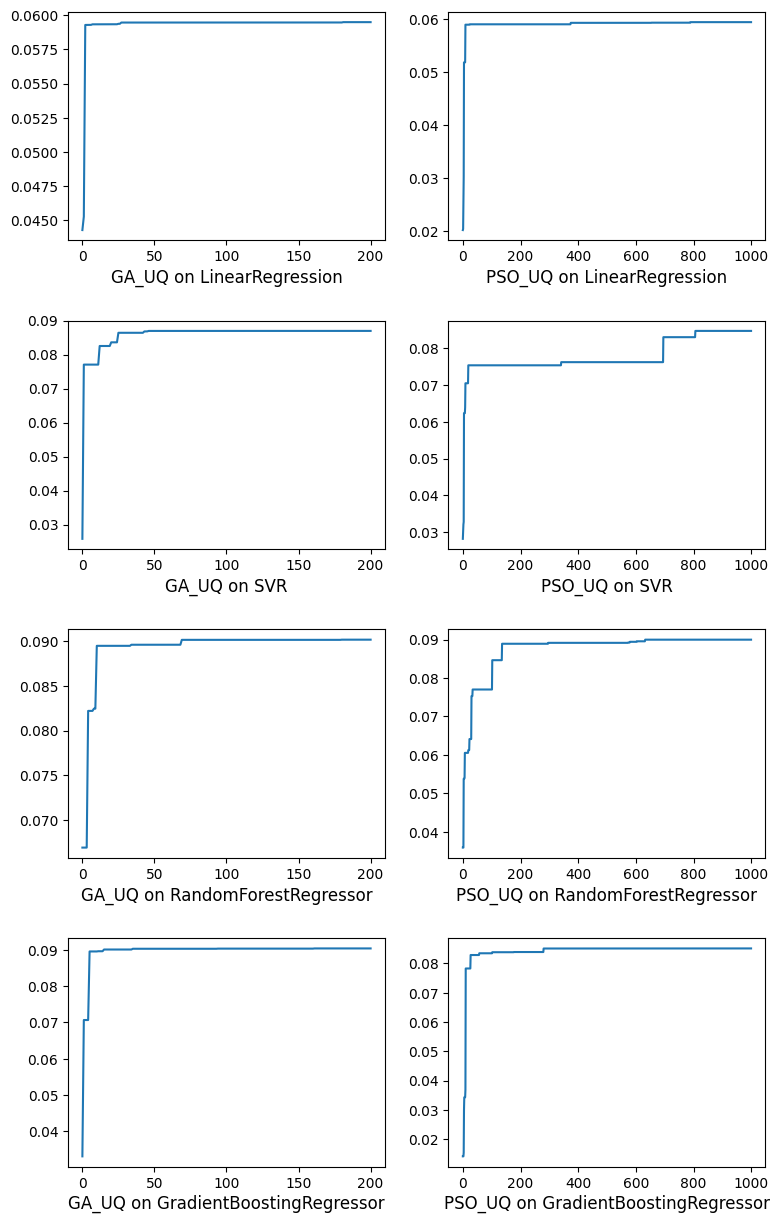

In [19]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(4,2,figsize=(9,15))
names=["LinearRegression","SVR","RandomForestRegressor","GradientBoostingRegressor"]
for i in range(4):
    y=np.maximum.accumulate(GA_instances[i].solutions_fitness)[::16]
    x=range(len(y))
    ax[i,0].plot(x,y)
    x=range(len(PSO_fitnesses[i]))
    y=PSO_fitnesses[i]
    ax[i,1].plot(x,y)
    ax[i,0].set_title("GA_UQ on "+names[i],y=-.22)
    ax[i,1].set_title("PSO_UQ on "+names[i],y=-.22)
plt.subplots_adjust(hspace=0.35)

Text(0.5, -0.2, '(b) ')

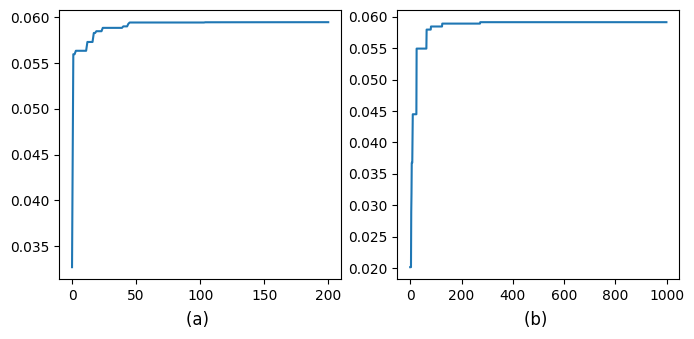

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(8,3.5))
names=["LinearRegression","SVR","RandomForestRegressor","GradientBoostingRegressor"]
i=0
y=np.maximum.accumulate(GA_instances[i].solutions_fitness)[::16]
x=range(len(y))
ax[0].plot(x,y)
x=range(len(PSO_fitnesses[i]))
y=PSO_fitnesses[i]
ax[1].plot(x,y)
ax[0].set_title("(a) ",y=-.2)
ax[1].set_title("(b) ",y=-.2)
plt.savefig('linear_regression.pdf', dpi=300)  # Set DPI to 300 for higher quality
